# Predicción a estrellas BeSOS

### Gestión de dependencias: instalación y verificación de paquetes

In [1]:
import importlib
import subprocess

librerias_requeridas = ['numpy', 'matplotlib', 'pandas', 'seaborn']

for lib in librerias_requeridas:
    try:
        importlib.import_module(lib)
        print(f'{lib} ya está instalada.')
    except ImportError:
        print(f'{lib} no está instalada. Instalando {lib}...')
        subprocess.check_call(['pip3', 'install', lib])

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import autokeras as ak

import multiprocessing
import pandas as pd
import pickle

import seaborn as sns
sns.set_theme(style="whitegrid")

numpy ya está instalada.
matplotlib ya está instalada.
pandas ya está instalada.
seaborn ya está instalada.


2023-06-15 00:13:56.763965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 00:13:56.813248: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 00:13:56.813799: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 00:13:58.855788: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Carga de modelo

In [2]:
model = load_model("Multi-Output-CNN", custom_objects=ak.CUSTOM_OBJECTS)

### Predicciones

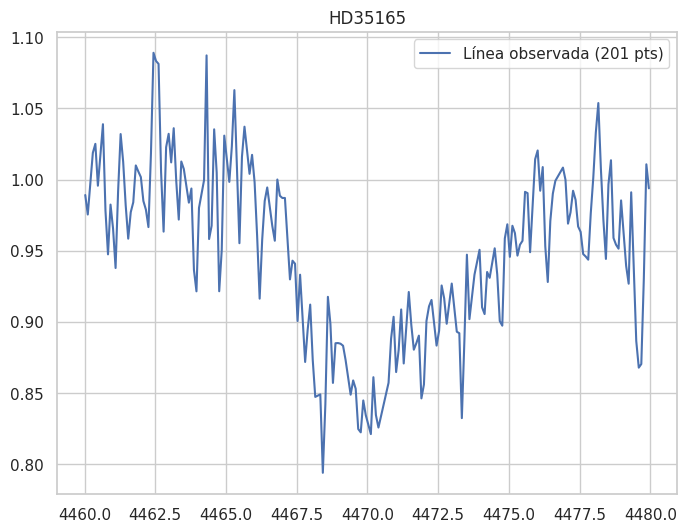

1/1 [==============================] - 0s 95ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD35165

Teff:  20.274
Log(g):  4.08
Vroot:  294


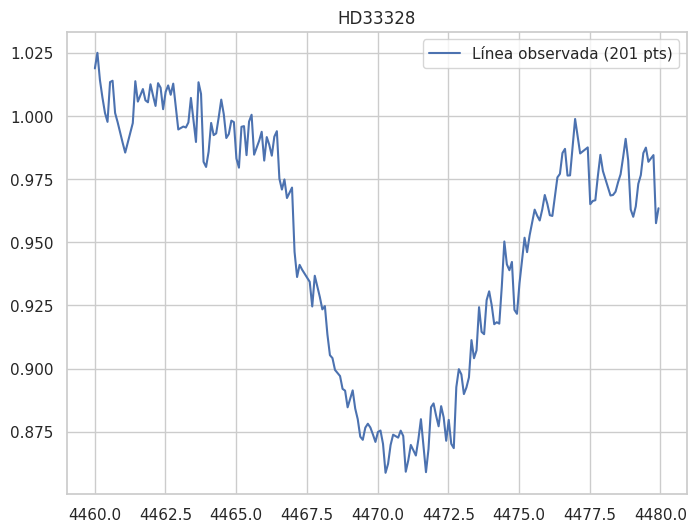

1/1 [==============================] - 0s 16ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD33328

Teff:  24.741
Log(g):  4.43
Vroot:  350


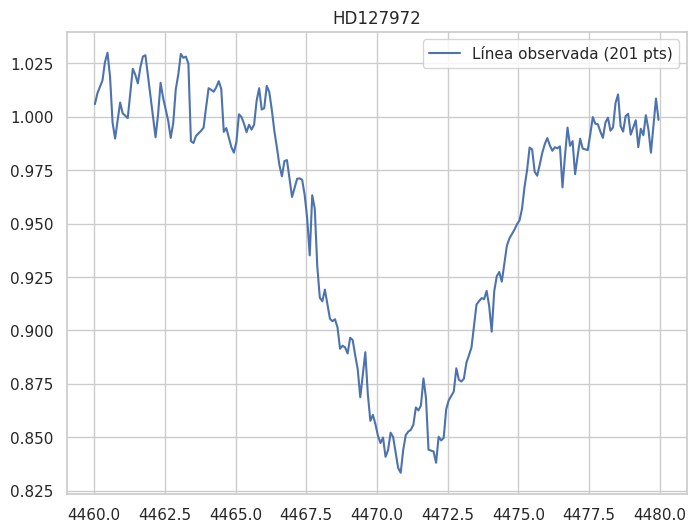

1/1 [==============================] - 0s 16ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD127972

Teff:  37.938
Log(g):  4.79
Vroot:  319


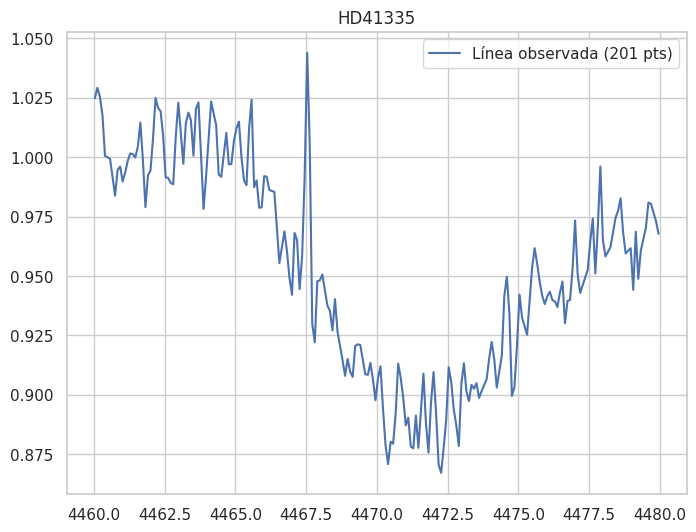

1/1 [==============================] - 0s 16ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD41335

Teff:  18.910
Log(g):  5.02
Vroot:  407


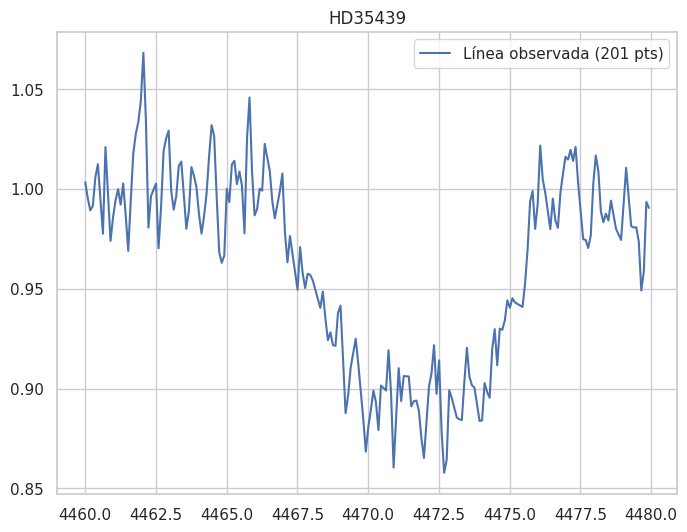

1/1 [==============================] - 0s 15ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD35439

Teff:  30.861
Log(g):  4.41
Vroot:  243


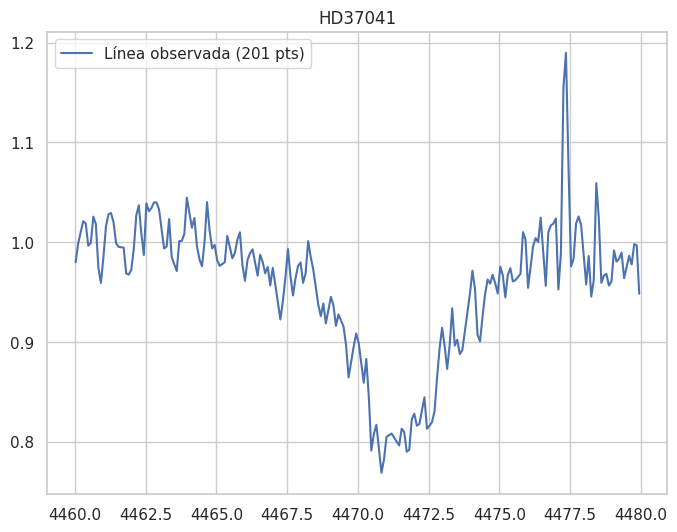

1/1 [==============================] - 0s 15ms/step
Parámetros estelares obtenidos mediante predicción - estrella HD37041

Teff:  38.099
Log(g):  4.54
Vroot:  300


,Estrella,Teff_real,Teff_pred,Error_Teff,logg_real,logg_pred,Error_Log_g,vroot_real,vroot_pred,Error_Vrot
0,HD35165,17.000,20.274,19.3,4.00,4.08,2.0,240,294,22.5
1,HD33328,19.526,24.741,26.7,3.30,4.43,34.2,287,350,22.0
2,HD127972,21.000,37.938,80.7,3.95,4.79,21.3,240,319,32.9
3,HD41335,22.500,18.910,16.0,3.35,5.02,49.9,330,407,23.3
4,HD35439,25.300,30.861,22.0,4.79,4.41,7.9,260,243,6.5
5,HD37041,27.500,38.099,38.5,3.72,4.54,22.0,140,300,114.3


In [3]:
# Definición de funciones
def dif_absoluta(v_real,v_predict):
    return abs(v_real-v_predict)

def dif_porcentual(v_real, v_predict):
    return abs(((v_predict/v_real) * 100) - 100)

# Inicialización de dataframe de resultados
resultados = pd.DataFrame(columns=["Estrella", "Teff_real", "Teff_pred", "logg_real", "logg_pred", "vroot_real", "vroot_pred"])

# Lista de estrellas y sus parámetros
stars = [('HD35165','HD35165_2015-11-14_04-22-43_final_corr',17000,4.00,240), #habian 2 archivos
         ('HD33328','hd33328_2013-02-26_00-55-34_final_corr',19526,3.30,287),      
         ('HD127972','hd127972_2014-01-31_07-43-08_final_corr',21000,3.95,240),
         ('HD41335','hd41335_2013-02-26_01-46-17_final_corr',22500,3.35,330),
         ('HD35439','HD35439_2015-02-25_00-02-51_final_corr',25300,4.79,260),
         ('HD37041','hd37041_2014-01-29_03-58-58_final_corr',27500,3.72,140), #habian 2 archivos
         ]
#('HD110335','hd110335_2014-01-30_07-02-46_final_corr',10600,2.90,) no tiene rotacion
#('HD35411','HD35411_2015-02-25_01-36-00_final_corr',25900,4.50,53) no tiene rango en vrot
# Desnormalización
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

for star in stars:
    name,name_long, Teff_real, logg_real, vroot_real = star

    # Carga del dataset
    df = pd.read_csv(f"../BESOS/2_Be_stars/{name}/{name_long}.txt", sep="\t", header=None)

    # Selección de datos
    df2 = df[(df[0] >= 4460) & (df[0] <= 4480)]

    n = 201  # for 2 random indices
    index = np.random.choice(df2.index, n, replace=False)
    df2 = df2.loc[index].sort_index()

    obs_wave = df2[0]
    obs_flux = df2[1]

    # Plot
    plt.figure(figsize=(8,6))
    plt.title(name)
    plt.plot(obs_wave, obs_flux, label="Línea observada (201 pts)")
    plt.legend(loc="best")
    plt.show()

    # Predicción
    pred_obs = model.predict(obs_flux.values.reshape(1,201))

    # Desnormalización de la predicción
    pred_obs_inv = scaler.inverse_transform(pred_obs)

    # Impresión de resultados
    Teff_pred=round(pred_obs_inv[0,0])
    logg_pred=round(pred_obs_inv[0,1],2)
    vroot_pred=round(pred_obs_inv[0,2])
    print(f"Parámetros estelares obtenidos mediante predicción - estrella {name}\n")
    print("Teff: ",format(Teff_pred, ',').replace(",", "X").replace(".", ",").replace("X", "."))
    print("Log(g): ",logg_pred)
    print("Vroot: ",vroot_pred)

    #print("Temperatura efectiva (Teff)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(Teff_real,pred_obs_inv[0,0]))
    #print("\tDiferencia porcentual: ",dif_porcentual(Teff_real,pred_obs_inv[0,0]) , "%")

    #print("\nGravedad superficial (Log g)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(logg_real,pred_obs_inv[0,1]))
    #print("\tDiferencia porcentual: ",dif_porcentual(logg_real,pred_obs_inv[0,1]), "%")

    #print("\nVelocidad de rotación (Vroot)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(vroot_real,pred_obs_inv[0,2]))
    #print("\tDiferencia porcentual: ",dif_porcentual(vroot_real,pred_obs_inv[0,2]), "%")

    # Agregar a resultados
    resultados_temp = pd.DataFrame({"Estrella": [name], 
                                    "Teff_real": [format(Teff_real, ',').replace(",", "X").replace(".", ",").replace("X", ".")], 
                                    "Teff_pred": [format(Teff_pred, ',').replace(",", "X").replace(".", ",").replace("X", ".")], 
                                    "Error_Teff": [f'{dif_porcentual(Teff_real,Teff_pred):.1f}'],
                                    "logg_real": [logg_real], 
                                    "logg_pred": [logg_pred], 
                                    "Error_Log_g": [f'{dif_porcentual(logg_real,logg_pred):.1f}'],
                                    "vroot_real": [vroot_real], 
                                    "vroot_pred": [vroot_pred],
                                    "Error_Vrot": [f'{dif_porcentual(vroot_real,vroot_pred):.1f}']})

    resultados = pd.concat([resultados, resultados_temp], ignore_index=True)
    # Especifica el orden de las columnas
    column_order = ["Estrella", "Teff_real", "Teff_pred", "Error_Teff", "logg_real", "logg_pred", "Error_Log_g", "vroot_real", "vroot_pred", "Error_Vrot"]

    # Reordena las columnas
    resultados = resultados[column_order]

resultados
